# Opencv Basic Operations
****************************

### Load Libraries and data for the session 

In [17]:
# importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(6,4),dpi=200)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [18]:
# Load required data
img_dset = {
    "rgb_img":'data/intro/rgb_img.jpg',
    "gray_img":'data/intro/gray_img.png',
    "depth_img":'data/intro/depth_img.png'
    }

In [19]:
# Reading an RGB image:
img_rgb = cv2.imread(img_dset['rgb_img'],1)

# Reading Grayscale image:
img_gray = cv2.imread(img_dset['gray_img'],0)

# Reading Depth image:
img_depth = cv2.imread(img_dset['depth_img'],2)

****************************
### Access details of image:
Find shape of image

In [20]:
print("shape of RGB image", img_rgb.shape)
print("shape of Gray image", img_gray.shape)
print("shape of depth image", img_depth.shape)

shape of RGB image (1824, 4000, 3)
shape of Gray image (1280, 1080)
shape of depth image (1280, 1080)


Find size and type of the images

In [21]:
# size of an image gives number of pixels in the image
print("size of RGB image", img_rgb.size)
print("size of Gray image", img_gray.size)
print("size of depth image", img_depth.size)

size of RGB image 21888000
size of Gray image 1382400
size of depth image 1382400


In [22]:
# data type of image gives an idea pixel ranges that image can hold
print("type of RGB image", img_rgb.dtype)
print("type of Gray image", img_gray.dtype)
print("type of depth image", img_depth.dtype)

type of RGB image uint8
type of Gray image uint8
type of depth image uint16


***********************************
### Creating images with numpy
Images can be created on the fly with numpy by using the correct datatype

In [23]:
help(np.ones)

Help on function ones in module numpy:

ones(shape, dtype=None, order='C', *, like=None)
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.
    
        .. note::
            

In [24]:
# we can use np.zeros or np.ones depending on the requirement
new_img = np.ones((100,100,3),dtype=np.uint8) * 255 # Creates a white image of (100,100,3) shape

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(new_img)
plt.axis('off')
plt.show()

*******************************
### Focusing on regions in an image

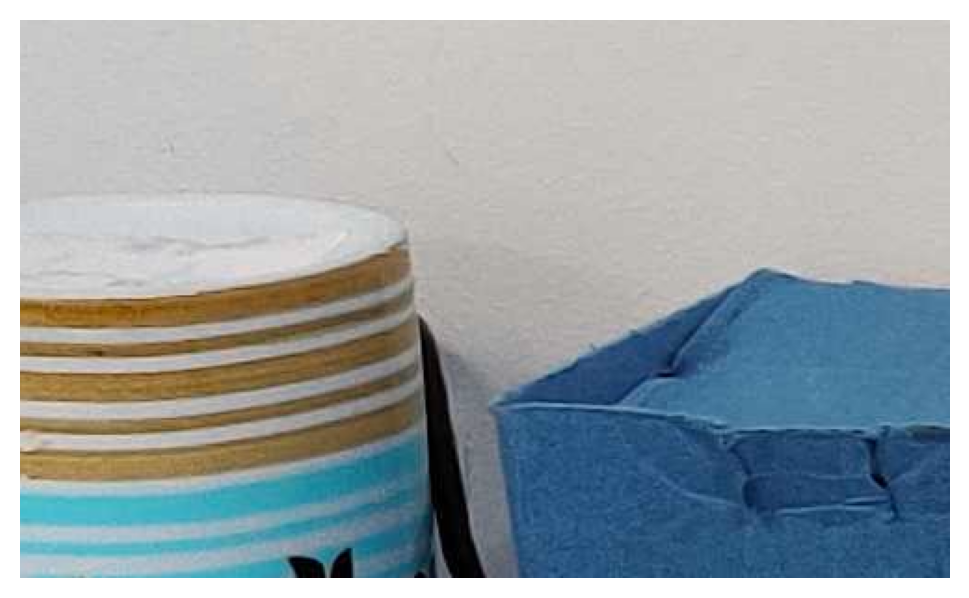

In [25]:
# image regions can be extracted by slicing out 
roi_rgb = img_rgb[700:1000,100:600,:]

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(roi_rgb)
plt.axis('off')
plt.show()

***********************************
### Arithmetic operations on images

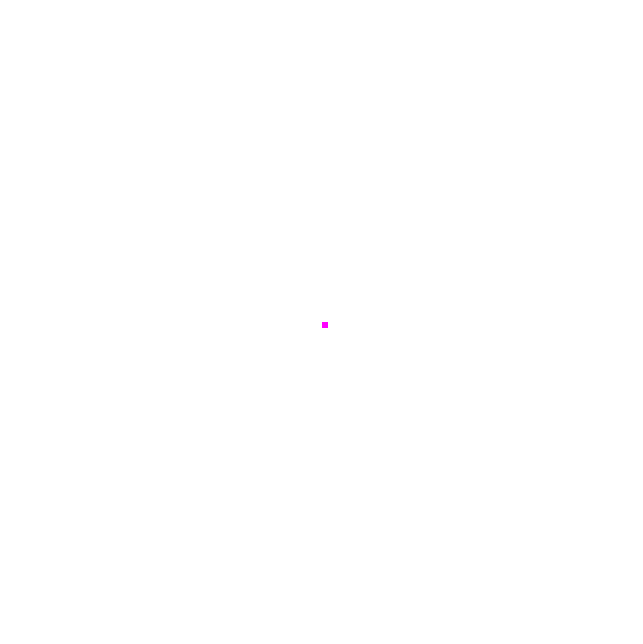

In [27]:
# Arithmetic operations on a single pixel
new_img[50,50,1] = 0

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(new_img)
plt.axis('off')
plt.show()

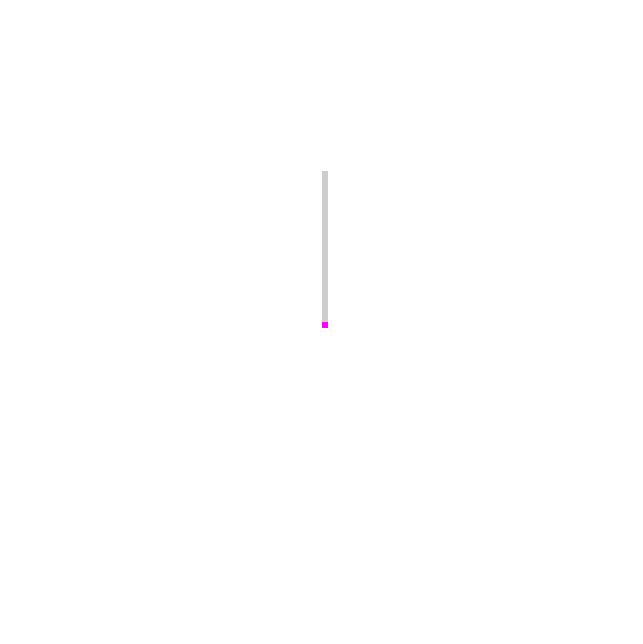

In [28]:
# Arithmetic operations on region of pixels
new_img[25:50,50,:] -= 50 # new_img[25:50,50,:] - 50

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [29]:
new_img[25:50,50,:] += 25

plt.figure(figsize=(6,4),dpi=200)
plt.imshow(new_img)
plt.axis('off')
plt.show()

*****************************
### Arithmetic operations between two images

In [30]:
img_1 = np.ones((100,100,3), dtype=np.uint8) * 100
img_2 = np.zeros((100,100,3),dtype=np.uint8)

img_2[25:75,:,:] = 100

img_res = img_1 + img_2

plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,3,1)
plt.imshow(img_1)
plt.axis('off')
plt.title("img_1")

plt.subplot(1,3,2)
plt.imshow(img_2)
plt.axis('off')
plt.title("img_2")

plt.subplot(1,3,3)
plt.imshow(img_res)
plt.axis('off')
plt.title("result image")


plt.show()

Blending two images together:
This can be achieved by following the equation:


$ g(x)=(1−\alpha)*f_{0}(x)+\alpha*f_{1}(x) $

In OpenCV there is a readymade API which carries out blending which follows the following equation:

$ dst=\alpha*img_{1}+\beta*img_{2}+\gamma $

In [31]:
help(cv2.addWeighted)

Help on built-in function addWeighted:

addWeighted(...)
    addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
    .   @brief Calculates the weighted sum of two arrays.
    .   
    .   The function addWeighted calculates the weighted sum of two arrays as follows:
    .   \f[\texttt{dst} (I)= \texttt{saturate} ( \texttt{src1} (I)* \texttt{alpha} +  \texttt{src2} (I)* \texttt{beta} +  \texttt{gamma} )\f]
    .   where I is a multi-dimensional index of array elements. In case of multi-channel arrays, each
    .   channel is processed independently.
    .   The function can be replaced with a matrix expression:
    .   @code{.cpp}
    .       dst = src1*alpha + src2*beta + gamma;
    .   @endcode
    .   @note Saturation is not applied when the output array has the depth CV_32S. You may even get
    .   result of an incorrect sign in the case of overflow.
    .   @param src1 first input array.
    .   @param alpha weight of the first array elements.
    .   @param src2 se

In [32]:
img_1 = np.ones((100,100,3), dtype=np.uint8) * 100
img_2 = np.zeros((100,100,3),dtype=np.uint8)

img_2[25:75,:,:] = 100

img_res = cv2.addWeighted(src1=img_1,alpha=0.7,src2=img_2,beta=0.3,gamma=0) 

plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,3,1)
plt.imshow(img_1)
plt.axis('off')
plt.title("img_1")

plt.subplot(1,3,2)
plt.imshow(img_2)
plt.axis('off')
plt.title("img_2")

plt.subplot(1,3,3)
plt.imshow(img_res)
plt.axis('off')
plt.title("result image")

plt.show()